In [38]:
import time 
from sklearn import metrics 
import pickle as pickle 
import pandas as pd
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image  
import os

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve,StratifiedKFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.base import clone

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import ShuffleSplit

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



In [39]:
wine_dataset = pd.read_csv("wine_dataset.csv")
wine_dataset.info()
wine_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   class                    5000 non-null   int64  
 1   Alcohol                  5000 non-null   float64
 2   Malic_acid               5000 non-null   float64
 3   Ash                      5000 non-null   float64
 4   Alcalinity_of_ash        5000 non-null   float64
 5   Magnesium                5000 non-null   float64
 6   Total_phenols            5000 non-null   float64
 7   Flavanoids               5000 non-null   float64
 8   Nonflavanoid_phenols     5000 non-null   float64
 9   Proanthocyanins          5000 non-null   float64
 10  Color_intensity          5000 non-null   float64
 11  Hue                      5000 non-null   float64
 12  Od_Hod_of_diluted_wines  5000 non-null   float64
 13  Proline                  5000 non-null   float64
dtypes: float64(13), int64(1)

class    Alcohol  Malic_acid       Ash  Alcalinity_of_ash   Magnesium  \
0      1  13.761443    0.972960  2.191146          14.349954  106.525734   
1      2  11.897923    1.297780  2.199666          17.478054  104.205421   
2      3  12.659632    1.748552  2.438597          21.584696   88.079451   
3      1  13.054828    1.817559  1.893926          15.390157  108.589893   
4      3  11.769431    3.017528  3.013448          17.081528   86.525235   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0       2.288580    2.584551              0.418044         1.862804   
1       2.716657    1.855066              0.318077         1.029640   
2       1.919476    0.681341              0.538078         1.327974   
3       2.662509    2.815723              0.278535         1.473812   
4       2.224963    0.846229              0.286065         1.644007   

   Color_intensity       Hue  Od_Hod_of_diluted_wines     Proline  
0         3.086808  1.169861                 2.819086  850.678431  
1         9.103668  1.353718                 2.780333  332.922006  
2         8.803633  0.643678                 1.569951  633.531687  
3         6.386732  0.820398                 3.694865  880.103325  
4        10.383464  0.734288                 2.747013  475.152492

In [40]:
print(wine_dataset.shape)
wine_dataset.isna().any().any()

(5000, 14)


False

array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Malic_acid'}>,
        <AxesSubplot:title={'center':'Ash'}>],
       [<AxesSubplot:title={'center':'Alcalinity_of_ash'}>,
        <AxesSubplot:title={'center':'Magnesium'}>,
        <AxesSubplot:title={'center':'Total_phenols'}>,
        <AxesSubplot:title={'center':'Flavanoids'}>],
       [<AxesSubplot:title={'center':'Nonflavanoid_phenols'}>,
        <AxesSubplot:title={'center':'Proanthocyanins'}>,
        <AxesSubplot:title={'center':'Color_intensity'}>,
        <AxesSubplot:title={'center':'Hue'}>],
       [<AxesSubplot:title={'center':'Od_Hod_of_diluted_wines'}>,
        <AxesSubplot:title={'center':'Proline'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

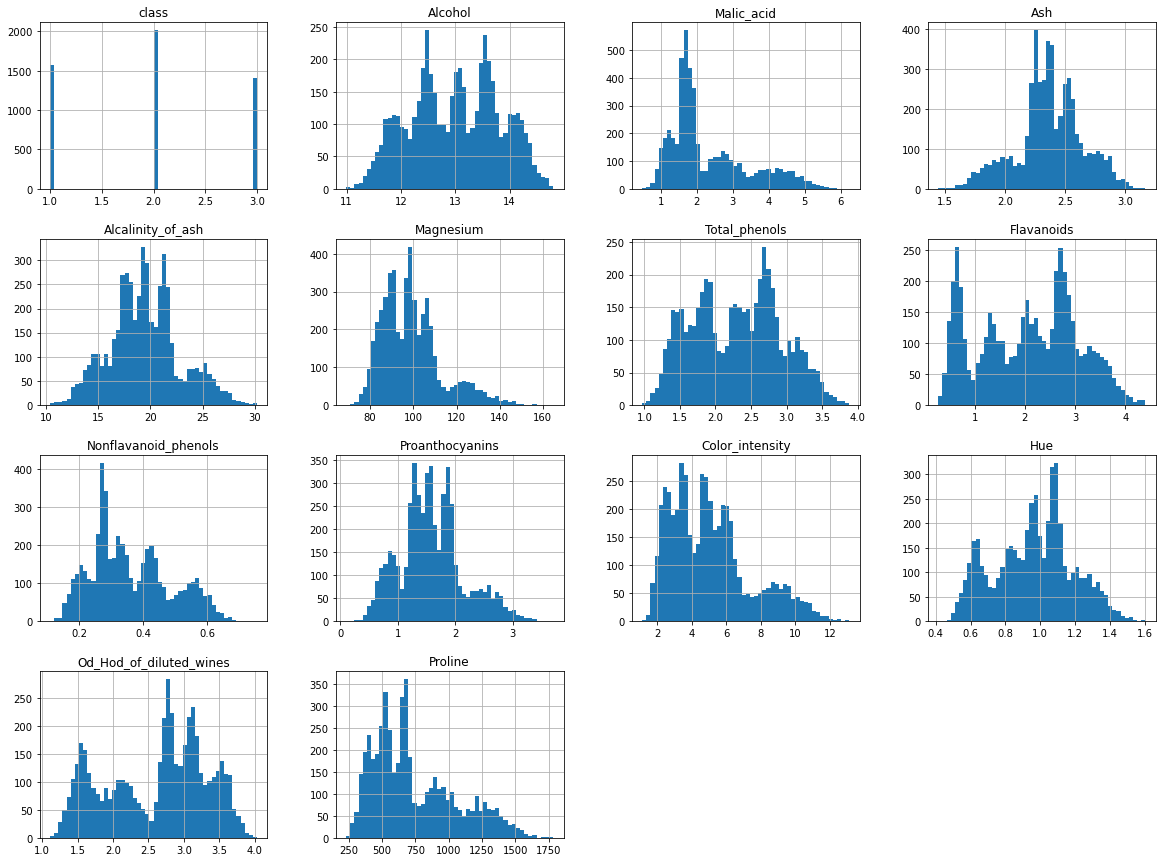

In [41]:
wine_dataset.hist(bins=50,figsize=(20,15))

In [42]:
target = wine_dataset["class"]
x = wine_dataset.values 
print(x.shape)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
print(x_scaled.shape)
wine_dataset = pd.DataFrame(x_scaled, columns=wine_dataset.columns)
wine_dataset["class"] = target
wine_dataset.head()

(5000, 14)
(5000, 14)


class   Alcohol  Malic_acid       Ash  Alcalinity_of_ash  Magnesium  \
0      1  0.726791    0.085805  0.432125           0.200468   0.392663   
1      2  0.237919    0.142156  0.437079           0.357903   0.368467   
2      3  0.437744    0.220358  0.576004           0.564587   0.200303   
3      1  0.541419    0.232330  0.259309           0.252821   0.414189   
4      3  0.204211    0.440507  0.910246           0.337946   0.184095   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0       0.452788    0.559874              0.477090         0.489749   
1       0.599717    0.382811              0.322602         0.258369   
2       0.326101    0.097921              0.662590         0.341220   
3       0.581132    0.615985              0.261494         0.381721   
4       0.430953    0.137943              0.273130         0.428986   

   Color_intensity       Hue  Od_Hod_of_diluted_wines   Proline  
0         0.163244  0.635628                 0.584439  0.399009  
1         0.665030  0.790293                 0.571170  0.065151  
2         0.640008  0.192992                 0.156748  0.258989  
3         0.438447  0.341653                 0.884296  0.417983  
4         0.771760  0.269215                 0.559762  0.156864

In [43]:
split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2, random_state=30)
for train_ind, test_ind in split.split(wine_dataset, wine_dataset["class"]):
    strat_train_set = wine_dataset.loc[train_ind]
    strat_test_set = wine_dataset.loc[test_ind]

In [44]:
train_set = strat_train_set
test_set = strat_test_set

In [45]:
train_set.info(), test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1725 to 3709
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   class                    4000 non-null   int64  
 1   Alcohol                  4000 non-null   float64
 2   Malic_acid               4000 non-null   float64
 3   Ash                      4000 non-null   float64
 4   Alcalinity_of_ash        4000 non-null   float64
 5   Magnesium                4000 non-null   float64
 6   Total_phenols            4000 non-null   float64
 7   Flavanoids               4000 non-null   float64
 8   Nonflavanoid_phenols     4000 non-null   float64
 9   Proanthocyanins          4000 non-null   float64
 10  Color_intensity          4000 non-null   float64
 11  Hue                      4000 non-null   float64
 12  Od_Hod_of_diluted_wines  4000 non-null   float64
 13  Proline                  4000 non-null   float64
dtypes: float64(13), int64

(None, None)

In [46]:
train_y = train_set[["class"]]
train_x = train_set.drop("class", axis=1)
test_y = test_set[["class"]]
test_x = test_set.drop("class", axis=1)

In [47]:
train_y1 = label_binarize(train_y, classes=[0, 1, 2])
test_y1= label_binarize(test_y, classes=[0, 1, 2])
n_classes = train_y1.shape[1]
print(n_classes)

3


In [48]:
# KNN Classifier 
def knn_classifier(train_x, train_y): 
    model = KNeighborsClassifier() 
    model.fit(train_x, train_y.values.ravel()) 
    return model 
  
# Decision Tree Classifier 
def decision_tree_classifier(train_x, train_y): 
    model = DecisionTreeClassifier() 
    model.fit(train_x, train_y) 
    return model 

# SVM Classifier 
def svm_classifier(train_x, train_y): 
    model = SVC(kernel='rbf', probability=True) 
    model.fit(train_x, train_y.values.ravel()) 
    return model 

# Boosting Classifier
def adaboost_classifier(train_x, train_y): 
    model = AdaBoostClassifier(DecisionTreeClassifier(),algorithm="SAMME", n_estimators=7, learning_rate=0.4)
    model.fit(train_x, train_y.values.ravel())
    return model

# Neural Networks Classifier
def neural_networks_classifier(train_x, train_y):
    model = MLPClassifier(activation='relu', alpha=0.0001,solver='adam')
    model.fit(train_x, train_y.values.ravel())
    return model


In [49]:
test_classifiers = ['KNN(K_Nearest_neghibours)', 'DT(Decision_tree)', 'SVM(Support_vector_machine)','Adaboost','NN(Neural_Networks)'] 
classifiers = {
    'Adaboost':adaboost_classifier,
    'KNN(K_Nearest_neghibours)':knn_classifier,
    'DT(Decision_tree)':decision_tree_classifier,
    'SVM(Support_vector_machine)':svm_classifier,
    'NN(Neural_Networks)':neural_networks_classifier
}

In [50]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt

In [51]:
# def plot_roc_curve(fpr, tpr, label=None):
#     plt.plot(fpr, tpr, linewidth=2, label=label)
#     plt.plot([0,1], [0,1], 'k--')
#     plt.axis([0,1,0,1])
#     plt.legend()
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')

******************* KNN(K_Nearest_neghibours) ********************
KNeighborsClassifier()
training took 0.007516s!
precision: 92.04%, recall: 92.00%
accuracy: 92.00%

classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.91      0.94      0.92       315

   micro avg       0.91      0.94      0.92       315
   macro avg       0.45      0.47      0.46       315
weighted avg       0.91      0.94      0.92       315


confusion_matrix:
[[  0   0]
 [  0 296]]
elaspe: 8.464014


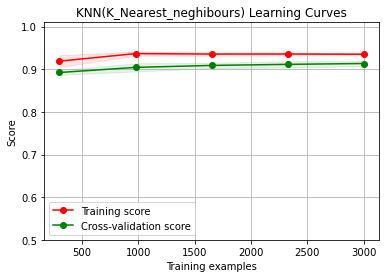


******************* DT(Decision_tree) ********************
DecisionTreeClassifier()
training took 0.054777s!
precision: 89.12%, recall: 89.10%
accuracy: 89.10%

classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.88      0.92      0.90       315

   micro avg       0.88      0.92      0.90       315
   macro avg       0.44      0.46      0.45       315
weighted avg       0.88      0.92      0.90       315


confusion_matrix:
[[  0   0]
 [  0 291]]
elaspe: 1.179637


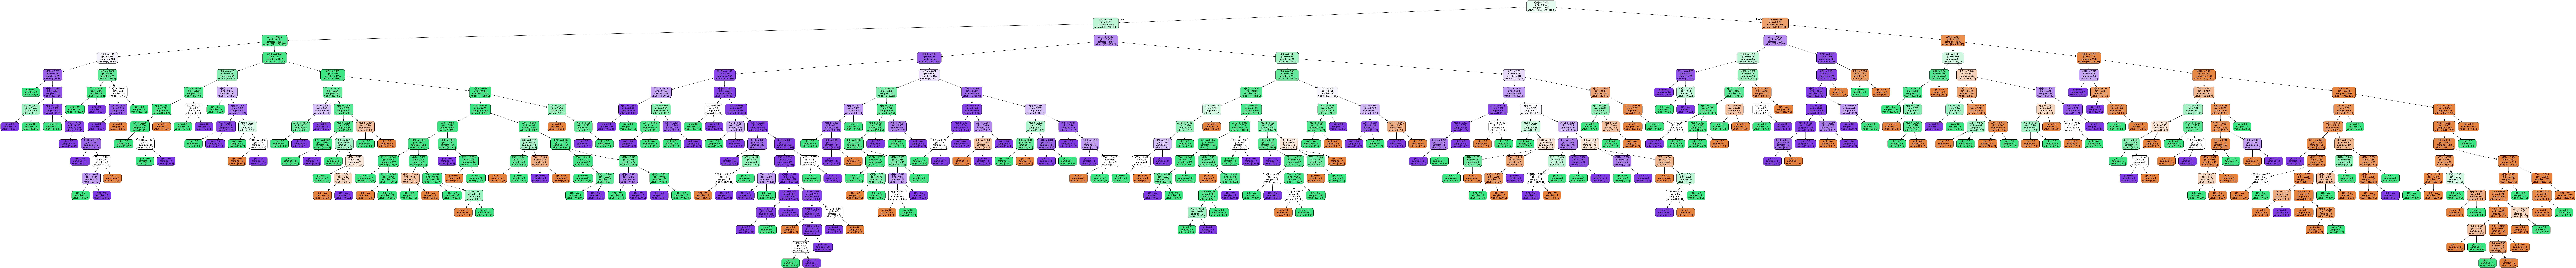

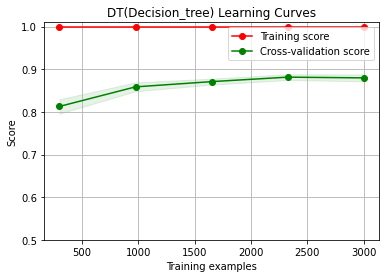


******************* SVM(Support_vector_machine) ********************
SVC(probability=True)
training took 0.755581s!
precision: 93.12%, recall: 93.10%
accuracy: 93.10%

classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.92      0.94      0.93       315

   micro avg       0.92      0.94      0.93       315
   macro avg       0.46      0.47      0.46       315
weighted avg       0.92      0.94      0.93       315


confusion_matrix:
[[  0   0]
 [  0 297]]
elaspe: 10.860301


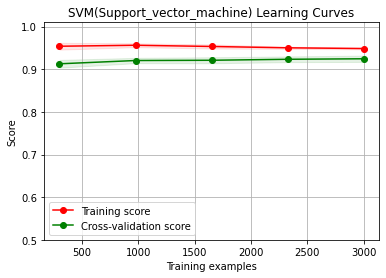


******************* Adaboost ********************
AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=0.4, n_estimators=7)
training took 0.051735s!
precision: 88.66%, recall: 88.60%
accuracy: 88.60%

classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.88      0.92      0.90       315

   micro avg       0.88      0.92      0.90       315
   macro avg       0.44      0.46      0.45       315
weighted avg       0.88      0.92      0.90       315


confusion_matrix:
[[  0   0]
 [  0 289]]
elaspe: 1.207331


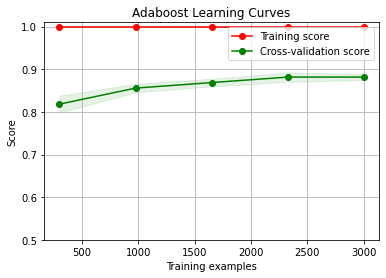


******************* NN(Neural_Networks) ********************
MLPClassifier()
training took 13.290485s!
precision: 93.55%, recall: 93.50%
accuracy: 93.50%

classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.91      0.95      0.93       315

   micro avg       0.91      0.95      0.93       315
   macro avg       0.46      0.47      0.47       315
weighted avg       0.91      0.95      0.93       315


confusion_matrix:
[[  0   0]
 [  0 299]]
elaspe: 275.578727


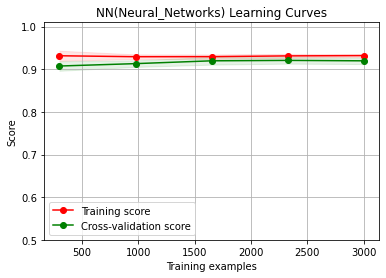

In [52]:
for classifier in test_classifiers:
    print('******************* %s ********************' % classifier)
    start_time = time.process_time()
    model = classifiers[classifier](train_x, train_y)
    print(model)
    print('training took %fs!' % (time.process_time() - start_time))
    predict = model.predict(test_x)
#     if model_save_file != None: 
#         model_save[classifier] = model )
    score = metrics.precision_score(test_y, predict,average = 'weighted') 
    recall = metrics.recall_score(test_y, predict,average = 'weighted')
    print('precision: %.2f%%, recall: %.2f%%' % (100 * score, 100 * recall)) 
    accuracy = metrics.accuracy_score(test_y, predict) 
    print('accuracy: %.2f%%' % (100 * accuracy))
    c_matrix = confusion_matrix(
        test_y,   # array, Gound true (correct) target values
        predict,  # array, Estimated targets as returned by a classifier
        labels=[0,1],  # array, List of labels to index the matrix.
        sample_weight=None  # array-like of shape = [n_samples], Optional sample weights
    )
    print('\nclassification_report:')
    print(classification_report( test_y,predict,labels=[0,1]))

    print('\nconfusion_matrix:')
    print(c_matrix)
    
    cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
    title = classifier+' Learning Curves'
    start = time.process_time()
    plot_learning_curve(model,title,train_x, train_y, ylim=(0.5, 1.01), cv=cv)

    print('elaspe: {0:.6f}'.format(time.process_time()-start))
    
#     curve1 = plot_roc_curve(model, x_train, y_train,  alpha=0.8,name=classifier)
#     curve1.figure_.suptitle("wine ROC")
    
    #draw DecisionTree
    if classifier == 'DT(Decision_tree)':
        dot_data = export_graphviz(model,
                                out_file = None,
                                filled=True,
                                rounded=True
                               )
        graph = pydotplus.graph_from_dot_data(dot_data)
        display(Image(graph.create_png()))
    plt.show()
    print()

In [53]:
# KNN_classifier
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                         weights='uniform')

KNeighborsClassifier()

In [54]:
# Decisiontree_Classifier
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DecisionTreeClassifier(criterion='entropy')

In [55]:
# Boosting_Classifier
AdaBoostClassifier(algorithm='SAMME',  
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,  
                                                         class_weight=None,  
                                                         criterion='gini',  
                                                         max_depth=None,  
                                                         max_features=None,  
                                                         max_leaf_nodes=None,  
                                                         min_impurity_decrease=0.0,  
                                                         min_impurity_split=None,  
                                                         min_samples_leaf=1,  
                                                         min_samples_split=2,  
                                                         min_weight_fraction_leaf=0.0,  
                                                         presort='deprecated',  
                                                         random_state=None,  
                                                         splitter='best'),  
                   learning_rate=0.4, n_estimators=7, random_state=None)

AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=0.4, n_estimators=7)

In [56]:
# SVM_classifier
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

SVC(probability=True)

In [57]:
# Neural_Networks Classifier
MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, 
batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True,
 random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
 early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

MLPClassifier()

In [58]:
def grid_search(model,param_grid,train_x,train_y,cv=5):
    grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs = -1, verbose=1) 
    grid_search.fit(train_x, train_y) 
    best_parameters = grid_search.best_estimator_.get_params() 
    print('Best Estimator:',best_parameters)
    return grid_search.best_estimator_

In [59]:
common_classifiers = ['KNN(K_Nearest_neghibours)','DT(Decision_tree)', 'SVM(Support_vector_machine)','NN(Neural_Networks)' ] 
ensem_classifiers = ['Adaboost']
basic_classifiers = {
    'KNN(K_Nearest_neghibours)':KNeighborsClassifier(),
    'DT(Decision_tree)': DecisionTreeClassifier() ,
    'SVM(Support_vector_machine)': SVC(kernel='rbf', probability=True),
    'NN(Neural_Networks)':MLPClassifier(),
    'Adaboost': AdaBoostClassifier(DecisionTreeClassifier(),algorithm="SAMME", n_estimators=7, learning_rate=0.4)
}
grid_params = {
    'KNN(K_Nearest_neghibours)':[
        {'weights':['uniform'],'n_neighbors':np.arange(4,8,1)},
        {'weights':['distance'],'n_neighbors':np.arange(4,8,1)},
    ],
    'DT(Decision_tree)':[
        {'min_samples_split':np.arange(1,15,1),'min_samples_leaf':np.arange(1,15,1),'splitter':['random']},
        {'min_samples_split':np.arange(1,15,1),'min_samples_leaf':np.arange(1,15,1),'splitter':['best']},
    ],
    'SVM(Support_vector_machine)':[
      {'C': [1e-1, 1, 10, 100, 1000], 'kernel': ['linear']},
      {'C': [1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
    ],
    
    'NN(Neural_Networks)':[
        {
            'hidden_layer_sizes': [(3,5), (30,50), (200,400)],
            "alpha" : [0.001, 0.0001],
            'learning_rate': ['constant', 'invscaling'],
        }
    ]
}

ensem_params = {
    'Adaboost':{'n_estimators':np.arange(1,11,1),'learning_rate':np.arange(0.1,1,0.1)}
}



In [60]:
for classifier in common_classifiers:
    print('******************* %s ********************' % classifier)
    start_time = time.process_time()
    model = basic_classifiers[classifier]
    clf = grid_search(model,grid_params[classifier],train_x,train_y,cv=5) 
    print('training took %fs!' % (time.process_time() - start_time))
    print(clf)
    clf.fit(train_x,train_y)
    predict = clf.predict(test_x)

    score = metrics.precision_score(test_y, predict,average = 'weighted') 
    recall = metrics.recall_score(test_y, predict,average = 'weighted')
    print('precision: %.2f%%, recall: %.2f%%' % (100 * score, 100 * recall)) 
    accuracy = metrics.accuracy_score(test_y, predict) 
    print('accuracy: %.2f%%' % (100 * accuracy))
    c_matrix = confusion_matrix(
        test_y,   # array, Gound true (correct) target values
        predict,  # array, Estimated targets as returned by a classifier
        labels=[0,1],  # array, List of labels to index the matrix.
        sample_weight=None  # array-like of shape = [n_samples], Optional sample weights
    )
    print('\nclassification_report:')
    print(classification_report( test_y,predict,labels=[0,1]))

    print('\nconfusion_matrix:')
    print(c_matrix)
    print()
#     curve1 = plot_roc_curve(clf, x_train, y_train,  alpha=0.8,name=classifier)
#     curve1.figure_.suptitle("Breast_Cancer ROC")
    plt.show()




******************* KNN(K_Nearest_neghibours) ********************
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Estimator: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
training took 0.258474s!
KNeighborsClassifier(weights='distance')
precision: 92.11%, recall: 92.10%
accuracy: 92.10%

classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.92      0.94      0.93       315

   micro avg       0.92      0.94      0.93       315
   macro avg       0.46      0.47      0.46       315
weighted avg       0.92      0.94      0.93       315


confusion_matrix:
[[  0   0]
 [  0 296]]

******************* DT(Decision_tree) ********************
Fitting 5 folds for each of 392 candidates, totalling 1960 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1875 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 1960 out of 1960 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Estimator: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 11, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
training took 1.314614s!
DecisionTreeClassifier(min_samples_leaf=11)
precision: 90.62%, recall: 90.60%
accuracy: 90.60%

classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.90      0.92      0.91       315

   micro avg       0.90      0.92      0.91       315
   macro avg       0.45      0.46      0.45       315
weighted avg       0.90      0.92      0.91       315


confusion_matrix:
[[  0   0]
 [  0 290]]

******************* SVM(Support_vector_machine) ********************
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   26.0s finished


Best Estimator: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
training took 0.608079s!
SVC(C=1, kernel='linear', probability=True)
precision: 93.02%, recall: 93.00%
accuracy: 93.00%

classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.92      0.95      0.93       315

   micro avg       0.92      0.95      0.93       315
   macro avg       0.46      0.47      0.47       315
weighted avg       0.92      0.95      0.93       315


confusion_matrix:
[[  0   0]
 [  0 298]]

******************* NN(Neural_Networks) ********************
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.4min finished


Best Estimator: {'activation': 'relu', 'alpha': 0.001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (30, 50), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
training took 14.999388s!
MLPClassifier(alpha=0.001, hidden_layer_sizes=(30, 50),
              learning_rate='invscaling')
precision: 93.40%, recall: 93.40%
accuracy: 93.40%

classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.93      0.94      0.93       315

   micro avg       0.93      0.94      0.93       315
   macro avg       0.46      0.47      0.47       315
weighted avg       0.93   

In [61]:
for classifier in ensem_classifiers:
    print('******************* %s ********************' % classifier)
    start_time = time.process_time()
    model = basic_classifiers[classifier]
    clf = grid_search(model,ensem_params[classifier],train_x,train_y,cv=5) 
    print('training took %fs!' % (time.process_time() - start_time))
    print(clf)
    clf.fit(train_x,train_y)
    predict = clf.predict(test_x)

    score = metrics.precision_score(test_y, predict,average = 'weighted') 
    recall = metrics.recall_score(test_y, predict,average = 'weighted')
    print('precision: %.2f%%, recall: %.2f%%' % (100 * score, 100 * recall)) 
    accuracy = metrics.accuracy_score(test_y, predict) 
    print('accuracy: %.2f%%' % (100 * accuracy))
    c_matrix = confusion_matrix(
        test_y,   
        predict,  
        labels=[0,1],  
        sample_weight=None  
    )
    print('\nclassification_report:')
    print(classification_report( test_y,predict,labels=[0,1]))

    print('\nconfusion_matrix:')
    print(c_matrix)

    print()
#     curve1 = plot_roc_curve(clf, x_train, y_train,  alpha=0.8,name=classifier)
#     curve1.figure_.suptitle("Breast_cancer ROC")
    plt.show()


******************* Adaboost ********************
Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.8s


Best Estimator: {'algorithm': 'SAMME', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': 'deprecated', 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(), 'learning_rate': 0.4, 'n_estimators': 3, 'random_state': None}
training took 0.925844s!
AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=0.4, n_estimators=3)
precision: 89.85%, recall: 89.80%
accuracy: 89.80%

classification_report:
              precision    recall  f1-score   support

           

[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    4.8s finished
